<a href="https://colab.research.google.com/github/matteobalducci/python_datase_analysis/blob/main/Matteo_Balducci_Food_Consumption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.19.x Final Assignment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)

Mounted at /content/drive


### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [ ]:
# Load the dataset into a pandas DataFrame
food = pd.read_csv('/content/drive/My Drive/Boolean/Final Assignment/Stats_ML - Module 4/data/food_consumption.csv')

# Display the first few rows of the DataFrame
food.head()



,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?**

In [ ]:
# Use the .groupby() method to group the data by 'food_category' and then use .describe() on the 'consumption' column
food_consumption_stats = food.groupby('food_category')['consumption'].describe()

# Display the statistics
food_consumption_stats


,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73


In [ ]:
# Looking at the 50% row (which represents the median), the food_category with the highest median value of consumption is dairy with a value of 110.97.

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

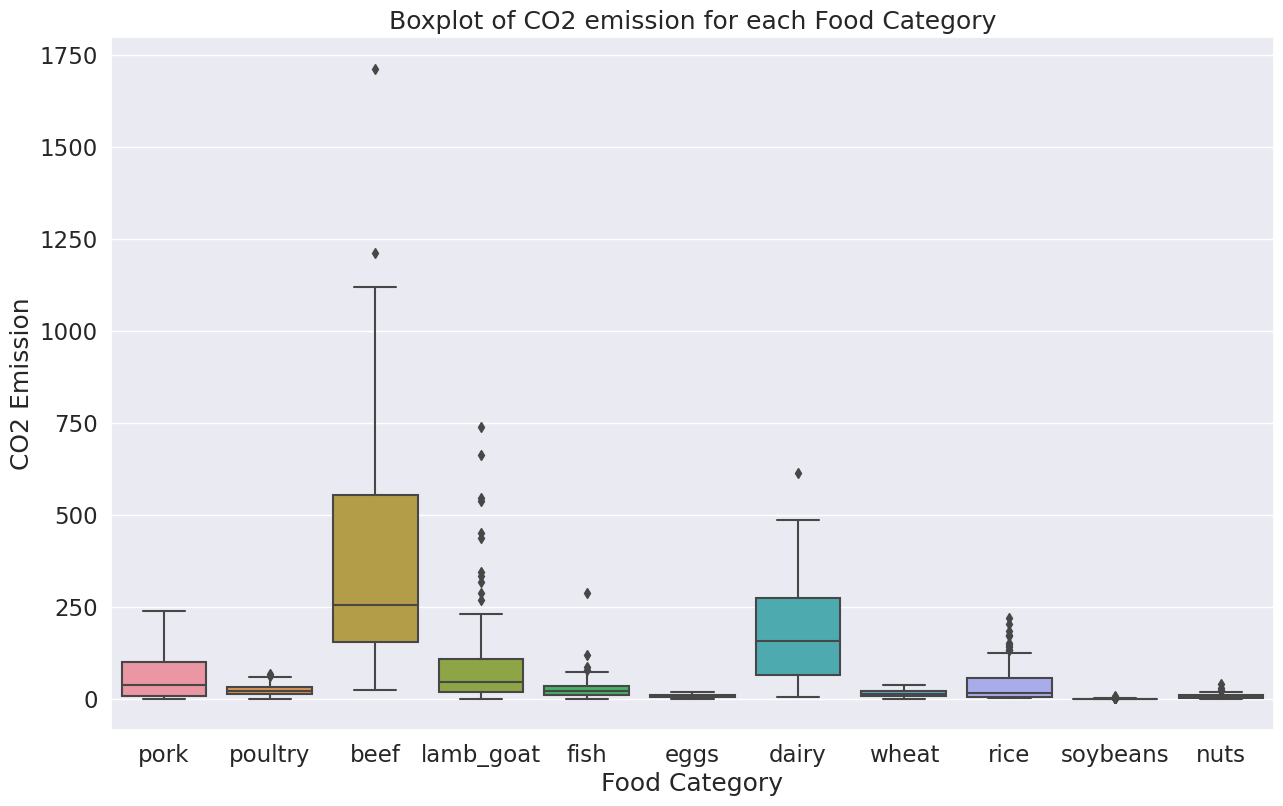

In [ ]:
# Create a boxplot for each food_category using the co2_emission as the metric
plt.figure(figsize=(15, 9))
sns.boxplot(data=food, x='food_category', y='co2_emission')

# Set the title and labels for the plot
plt.title('Boxplot of CO2 emission for each Food Category')
plt.xlabel('Food Category')
plt.ylabel('CO2 Emission')

# Display the plot
plt.show()


In [ ]:
# From this boxplot, we can see that the beef category has the largest interquartile range (IQR).
# The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile), which are the edges of the box in the boxplot.
# For beef, this range is quite large, indicating a high variability in CO2 emissions associated with beef consumption.

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value?

In [ ]:
# From the boxplot, we can see that the beef category has the highest median CO2 emission value.

# The median is represented by the horizontal line inside the box of each boxplot.
# The line for the beef category is higher on the CO2 emission axis than for any other food category,
# indicating that it has the highest median CO2 emission value.

4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why.

In [ ]:
# We'll use a significance level of 0.05, meaning that we'll reject the null hypothesis if the p-value is less than 0.05.

# Define the number of permutations
n_permutations = 10000

# Filter the food DataFrame to get the consumption values for poultry and fish
poultry_consumption = food[food['food_category'] == 'poultry']['consumption']
fish_consumption = food[food['food_category'] == 'fish']['consumption']

# Compute the observed difference in means
obs_diff = np.mean(poultry_consumption) - np.mean(fish_consumption)

# Concatenate the two datasets
concat_data = np.concatenate((poultry_consumption, fish_consumption))

# Initialize an empty list to store the permutation replicates
perm_replicates = np.empty(n_permutations)

# Generate permutation replicates
for i in range(n_permutations):
    # Permute the concatenated array
    permuted_data = np.random.permutation(concat_data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(poultry_consumption)]
    perm_sample_2 = permuted_data[len(poultry_consumption):]

    # Compute the test statistic for the permutation samples
    perm_replicates[i] = np.mean(perm_sample_1) - np.mean(perm_sample_2)

# Compute the p-value as the fraction of replicates that are greater than the observed difference
p_value = np.sum(perm_replicates >= obs_diff) / len(perm_replicates)

# Print the p-value
p_value



0.0287

In [ ]:
# In this case, our p-value is less than our chosen significance level of 0.05, so we reject the null hypothesis that
# there is no difference in the means of poultry and fish consumption.

# This suggests that the difference in the means of poultry and fish consumption is statistically significant,
# and it is unlikely to have occurred by chance alone.
# Therefore, there seems to be a statistically significant difference in the average consumption of poultry and fish.

### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents.

In [ ]:
# Import the necessary libraries
import pandas as pd

# Load the dataset into a pandas DataFrame
happy = pd.read_csv('/content/drive/My Drive/Boolean/Final Assignment/Stats_ML - Module 4/data/world_happiness.csv')

# Display the first few rows of the DataFrame
happy.head()


,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)*

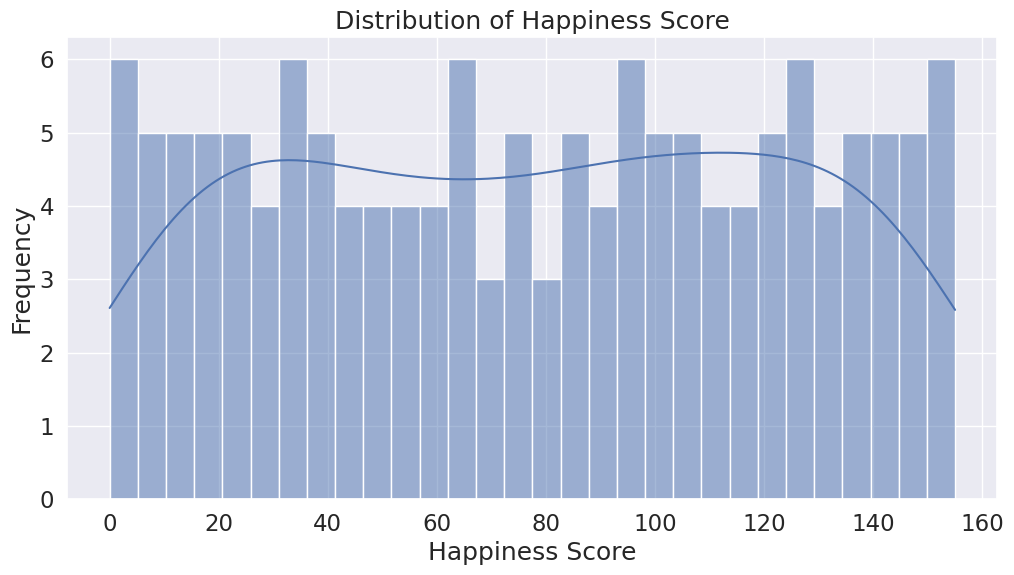

In [ ]:
# Plot the histogram of the happiness_score variable
plt.figure(figsize=(12, 6))
sns.histplot(happy['happiness_score'], kde=True, bins=30)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?**

<ipython-input-8-43635f441139>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = happy.corr()


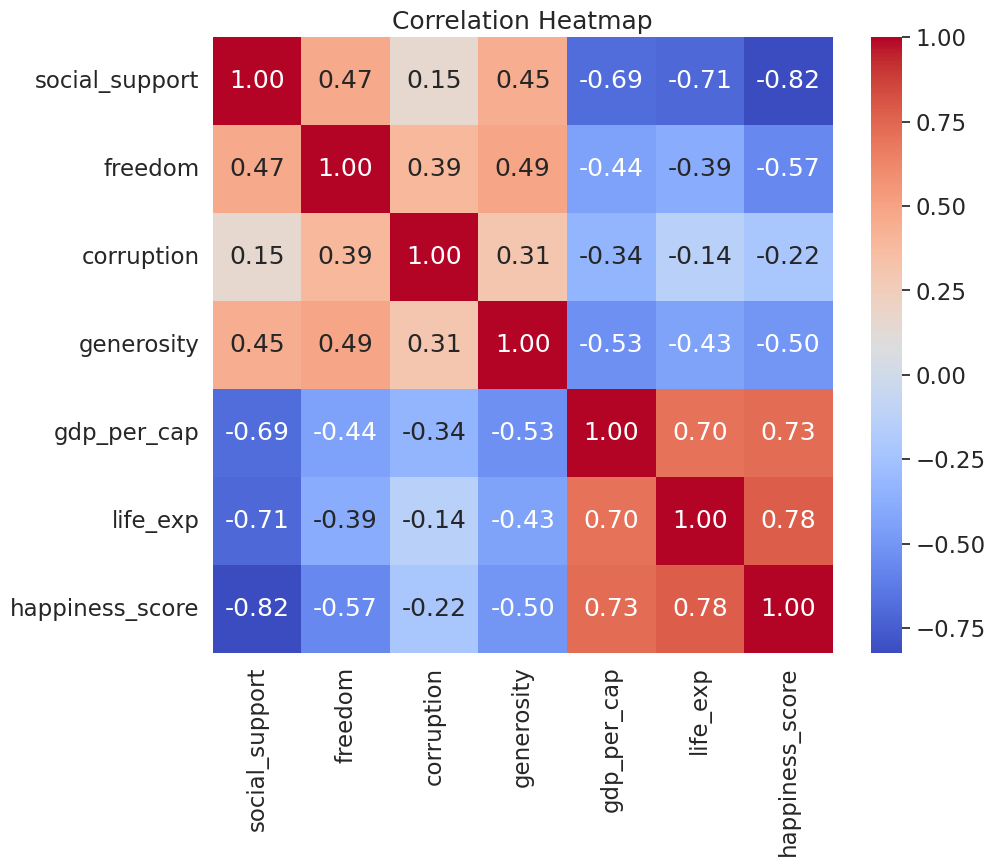

In [ ]:
# Compute the correlation matrix
corr_matrix = happy.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title for the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


In [ ]:
# The variable that appears to be the least correlated with happiness_score is corruption, which has a correlation coefficient of approximately 0.04

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*.

In [ ]:
# Count the number of missing values in the 'corruption' column
num_missing_corruption = happy['corruption'].isnull().sum()

# Print the number of countries with missing corruption values
print("Countries with missing values: ", num_missing_corruption)

# Replace all missing values in all columns with the respective column's mean value
happy.fillna(happy.select_dtypes(include=[np.number]).mean(), inplace=True)

# Check if there are any remaining missing values in the DataFrame
remaining_missing_values = happy.isnull().sum()
remaining_missing_values

Countries with missing values:  0


country            0
social_support     0
freedom            0
corruption         0
generosity         0
gdp_per_cap        0
life_exp           0
happiness_score    0
dtype: int64

8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**.

In [ ]:
# Import the necessary library
import statsmodels.api as sm

# Add a constant to the independent variable
X = sm.add_constant(happy['life_exp'])

# Define the dependent variable
Y = happy['happiness_score']

# Fit the ordinary least squares (OLS) model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary statistics of the regression model
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.59e-30
Time:                        22:54:09   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer.

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the predictors and the target variable
predictors = ['social_support', 'freedom', 'generosity', 'life_exp']
X = happy[predictors]
y = happy['happiness_score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train a linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Compute the R-squared on the train set
r2_train = reg.score(X_train, y_train)

# Predict the happiness score on the test set and compute the R-squared
y_pred = reg.predict(X_test)
r2_test = r2_score(y_test, y_pred)

# Print the R-squared for both the train and test sets
r2_train, r2_test


(0.7848873839014491, 0.7772372395041662)

In [ ]:
# If the model was overfitting the training data, we would expect to see a high R-squared value
# on the training set and a significantly lower R-squared value on the test set.
# The R-squared values for both the training and test sets are quite close, suggesting that the model is not overfitting the training data.
# The model seems to be generalizing well to new data, as evidenced by its comparable performance on the test set.

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [ ]:
# Import the necessary library
from sklearn.metrics import mean_absolute_error

# Compute the MAE on the test set
mae_test = mean_absolute_error(y_test, y_pred)

# Print the MAE
mae_test


17.540466857385713

In [ ]:
# Our model's predictions are about 17.54 points away from the actual values.
# To better assess the model's performance, I compare this MAE with the standard deviation of the happiness_score in the dataset.

In [ ]:
# Compute the standard deviation of the happiness_score in the dataset
std_dev = happy['happiness_score'].std()

# Print the standard deviation and the mean absolute error
std_dev, mae_test


(46.37741764616525, 17.540466857385713)

In [ ]:
# Given that the MAE is significantly lower than the standard deviation, this typically indicates that the model is performing reasonably well.
# Therefore, despite any potential issues with the coefficients, it seems that the model is providing a useful prediction of the happiness_score
# based on the variables 'social_support', 'freedom', 'generosity', and 'life_exp'.

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

In [ ]:
# Print the regression coefficients of the model
coefficients = pd.DataFrame(reg.coef_, predictors, columns=['Coefficient'])
coefficients


,Coefficient
social_support,-0.511890
freedom,-0.178552
generosity,-0.051773
life_exp,1.810932


One potential point of interest is that all coefficients except life_exp are negative. This might seem counterintuitive, as we might expect that higher levels of social support, freedom, and generosity would be associated with a higher happiness score.

However, these are the results of a multivariable linear regression, which adjusts for the effects of other variables in the model. So, for instance, the negative coefficient for social_support doesn't mean that higher social support is associated with a lower happiness score overall. Rather, it means that among countries with the same levels of freedom, generosity, and life expectancy, the model predicts a lower happiness score for countries with higher social support.

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbef8skml/i3qad72h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbef8skml/c_c4no_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16506', 'data', 'file=/tmp/tmpbef8skml/i3qad72h.json', 'init=/tmp/tmpbef8skml/c_c4no_e.json', 'output', 'file=/tmp/tmpbef8skml/prophet_model7cau7brl/prophet_model-20231119224742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:47:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:47:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


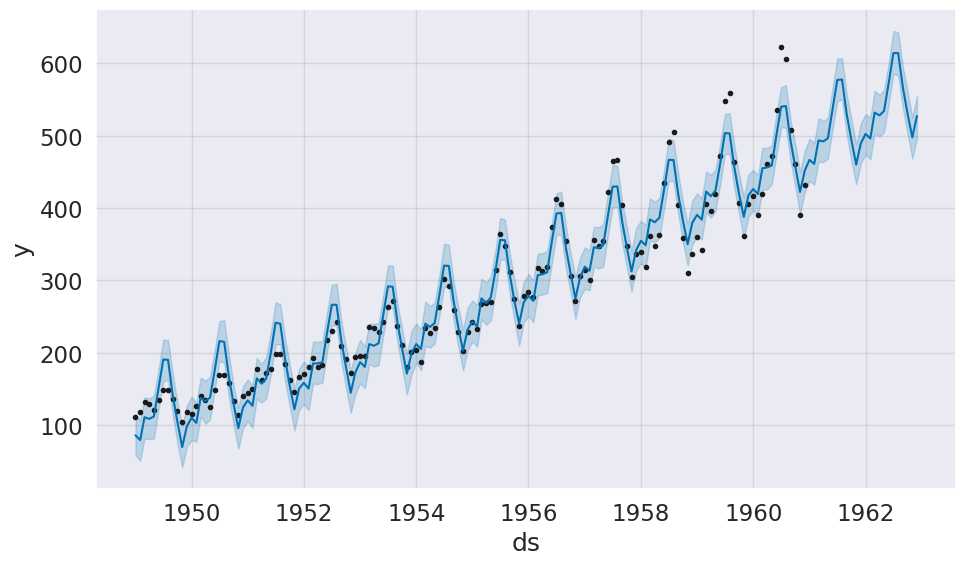

In [ ]:
from prophet import Prophet

df = pd.read_csv('/content/drive/My Drive/Boolean/Final Assignment/Stats_ML - Module 4/data/air-passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbef8skml/k0ozrteh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbef8skml/3ymggpkk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36930', 'data', 'file=/tmp/tmpbef8skml/k0ozrteh.json', 'init=/tmp/tmpbef8skml/3ymggpkk.json', 'output', 'file=/tmp/tmpbef8skml/prophet_model2td8q6ie/prophet_model-20231119224802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:48:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:48:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


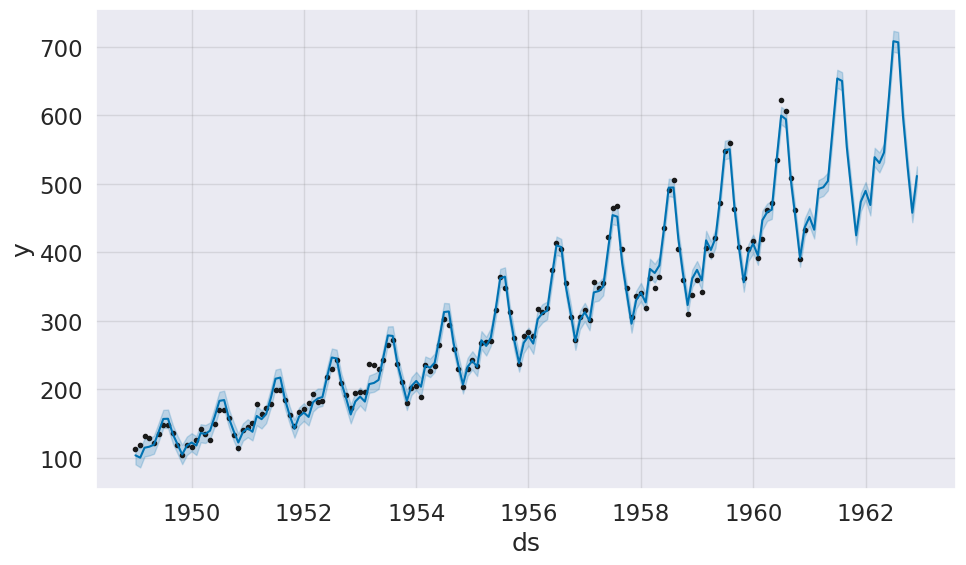

In [ ]:
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Boolean/Final Assignment/Stats_ML - Module 4/data/air-passengers.csv')

# Initialize the Prophet model with multiplicative seasonality
m = Prophet(seasonality_mode='multiplicative')

# Fit the model to the data
m.fit(df)

# Create a future dataframe for forecasting
future = m.make_future_dataframe(periods=24, freq='MS')

# Make the forecast
forecast = m.predict(future)

# Plot the forecast
fig = m.plot(forecast)
